In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# kmeans
from sklearn.cluster import KMeans

In [2]:
filename = "../gen_values.csv" # "../out.csv"

df = pd.read_csv(filename, sep=",").drop(columns=["Unnamed: 0"])
# df = pd.read_csv(filename, sep=",").drop(columns=["id"])

In [3]:
# df.head()

In [4]:
# KMeans

In [5]:
kmeans = KMeans(n_clusters=3, init="random")

In [6]:
kmeans.fit(df.values)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [7]:
labels

array([0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0], dtype=int32)

In [8]:
# PCA 

In [9]:
pca    = PCA()
data   = pca.fit_transform(df.values)
p_comp = pca.explained_variance_ratio_

In [10]:
centers_plot = pca.transform(centers)

In [11]:
colors = {1: "r", 2: "b", 3: "c", 4: "g", 5: "k"}

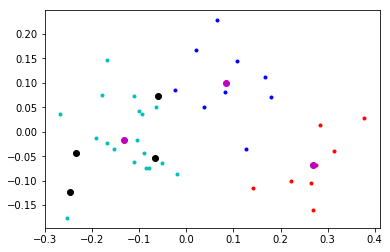

Cluster al que pertanyen els malaltys de variant G a la taula son: [2, 2, 2, 2]


In [19]:
plt.figure()

for i, label in enumerate(labels): 
    if i in [1, 2, 12, 19]:
        plt.plot(data[i, 0], data[i, 1], "ko")
    else:
        plt.plot(data[i, 0], data[i, 1], colors[label+1]+".")
    
plt.plot(centers_plot[:, 0], centers_plot[:, 1], "mo")
plt.show()

print "Cluster al que pertanyen els malaltys de variant G a la taula son:"\
      , [labels[i] for i in [1, 2, 12, 19]]

In [21]:
for l in set(labels):
    patients_cluster = []
    for i,label in enumerate(labels):
        if l == label:
            patients_cluster.append(i)
            
    print "Patients in cluster {0}: {1}".format(l, patients_cluster)

Patients in cluster 0: [0, 7, 10, 14, 16, 30, 35, 38]
Patients in cluster 1: [6, 20, 24, 26, 27, 29, 31, 36, 37]
Patients in cluster 2: [1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 17, 18, 19, 21, 22, 23, 25, 28, 32, 33, 34]


In [20]:
list(pca.explained_variance_ratio_)

[0.49744834085244305,
 0.1361957842106955,
 0.068445310445199456,
 0.063269182596833576,
 0.054468305170950762,
 0.039044216750121874,
 0.023427268923704281,
 0.016884207721870086,
 0.012820645641695586,
 0.012522213909084763,
 0.0080432435600344843,
 0.007326801240244994,
 0.0064964316325273278,
 0.0062928667375376198,
 0.0051773208794575944,
 0.0045555470587411587,
 0.0043407848209215802,
 0.0032281006269704112,
 0.0031038163317356924,
 0.002811520588480023,
 0.0023199485480537262,
 0.0022951430643357684,
 0.0021834859011712984,
 0.001939154450910916,
 0.0016885669626044305,
 0.0016197469144951934,
 0.0014627933724548257,
 0.0013698526145075331,
 0.0013116297275420918,
 0.001152769037867098,
 0.0010372174266027709,
 0.00097322730685062728,
 0.00093257157369341123,
 0.00084864016766349312,
 0.00080938359676589993,
 0.00077077196169471525,
 0.00070116315381726219,
 0.00068202451971890847,
 5.5818885376584176e-30]